# Botanist final project

#### Load packages

In [24]:
#pip uninstall keras
#!pip install keras
#!pip install tensorflow
#!pip install sklearn

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import keras
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers, optimizers
from keras.optimizers import RMSprop
from keras import regularizers


import tensorflow as tf
import keras

In [2]:
#get working directory
os. getcwd()

'C:\\Users\\akarunakaran1\\Documents\\TypeB_Botanist'

In [3]:
#change working directory to
#working_di_path = "/home/akarunakaran1/BotanistData/"
#os. chdir(working_di_path)
#os.getcwd()

'/home/akarunakaran1/BotanistData'

In [3]:
#read csv file
#path in cluster
#botanist_csv = pd.read_csv("/home/akarunakaran1/BotanistData/Botanist_Training_Set.csv",dtype=str)
#test_botanist_csv = pd.read_csv("/home/akarunakaran1/BotanistData/Botanist_Training_Set.csv",dtype=str)

#path in GPU
botanist_csv = pd.read_csv("C:/Users/akarunakaran1/Documents/TypeB_Botanist/TypeB_Botanist/Botanist_Training_Set.csv",dtype=str)
print("Number of rows in .csv file is: ", botanist_csv.shape)


test_botanist_csv = pd.read_csv("C:/Users/akarunakaran1/Documents/TypeB_Botanist/Botanist/Botanist_Test_Set.csv",dtype=str)
print("Number of rows in .csv file is: ", test_botanist_csv.shape)

Number of rows in .csv file is:  (50000, 2)
Number of rows in .csv file is:  (4000, 1)


In [4]:
train = botanist_csv.copy()
test = test_botanist_csv.copy()

print("Number of records for train", len(train))
print("Number of records for test", len(test))

Number of records for train 50000
Number of records for test 4000


In [6]:
train.columns

Index(['FileName', 'Label'], dtype='object')

In [8]:
#append the Filename in .csv file with .jpg
def append_ext(fn):
    return fn+".jpg"

train_df = train.copy()
test_df = test.copy()

In [9]:
train_df["FileName"] = train_df["FileName"].apply(append_ext)
print(train_df.head(5))

       FileName Label
0  45945143.jpg     6
1  91233284.jpg    25
2   3082537.jpg    17
3  13822720.jpg     7
4  17579915.jpg    25


In [10]:
test_df["FileName"] = test_df["FileName"].apply(append_ext)
print(test_df.head(5))

       FileName
0  64559325.jpg
1  52439467.jpg
2   1336013.jpg
3  77778059.jpg
4  28148617.jpg


In [11]:
#object for ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255.,validation_split=0.25)

In [13]:
#setting 
#batch_size = 32
#seed = 42

#split into train-validation data
train_generator = datagen.flow_from_dataframe( dataframe=train_df, 
                                              directory="C:/Users/akarunakaran1/Documents/TypeB_Botanist/TypeB_Botanist/TrainFiles/",
                                              x_col="FileName",y_col="Label",subset="training",batch_size=32,seed=42,shuffle=True,
                                              class_mode="categorical",target_size=(32,32))

valid_generator = datagen.flow_from_dataframe(dataframe=train_df, 
                                              directory="C:/Users/akarunakaran1/Documents/TypeB_Botanist/TypeB_Botanist/TrainFiles/",
                                              x_col="FileName",y_col="Label",subset="validation",batch_size=32,seed=42,shuffle=True,
                                              class_mode="categorical",target_size=(32,32))

Found 37500 validated image filenames belonging to 38 classes.
Found 12500 validated image filenames belonging to 38 classes.


## Model without any regularization

In [14]:
#fit model without regularization
def wo_regularization():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same',input_shape=(32,32,3)))
    model.add(Activation('relu'))
    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    #we have 38 label classes
    model.add(Dense(38, activation='softmax'))

    # Compile model
    model.compile(optimizers.RMSprop(lr=0.0001, decay=1e-6),
                  loss="categorical_crossentropy",metrics=["accuracy"])
    return model

In [15]:
#setting values
STEP_SIZE_TRAIN = train_generator.n//train_generator.batch_size
STEP_SIZE_VALID = valid_generator.n//valid_generator.batch_size

# build the model
model_wo_reg = wo_regularization()

#fitting the model
history_wo_reg = model_wo_reg.fit_generator(generator=train_generator,steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_generator,validation_steps=STEP_SIZE_VALID,epochs=10)

C:\Users\akarunakaran1\Documents\Anaconda\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
1171/1171 [==============================] - 228s 193ms/step - loss: 3.0190 - accuracy: 0.2155 - val_loss: 1.8100 - val_accuracy: 0.4941
Epoch 2/10
1171/1171 [==============================] - 226s 193ms/step - loss: 1.8475 - accuracy: 0.4777 - val_loss: 1.2388 - val_accuracy: 0.6540
Epoch 3/10
1171/1171 [==============================] - 222s 190ms/step - loss: 1.3839 - accuracy: 0.6014 - val_loss: 0.9777 - val_accuracy: 0.7141
Epoch 4/10
1171/1171 [==============================] - 223s 190ms/step - loss: 1.1207 - accuracy: 0.6667 - val_loss: 0.8009 - val_accuracy: 0.7683
Epoch 5/10
1171/1171 [==============================] - 225s 192ms/step - loss: 0.9663 - accuracy: 0.7062 - val_loss: 0.6992 - val_accuracy: 0.7877
Epoch 6/10
1171/1171 [==============================] - 227s 194ms/step - loss: 0.8514 - accuracy: 0.7402 - val_loss: 0.6509 - val_accuracy: 0.8017
Epoch 7/10
1171/1171 [==============================] - 224s 191ms/step - loss: 0.7829 - accuracy: 0.7585 - val_

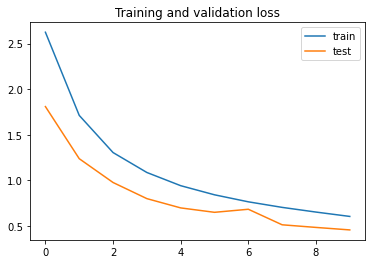

In [16]:
#model_wo_reg

# plot training history
plt.plot(history_wo_reg.history['loss'], label='train')
plt.plot(history_wo_reg.history['val_loss'], label='test')
plt.title('Training and validation loss')
plt.legend()
plt.show()

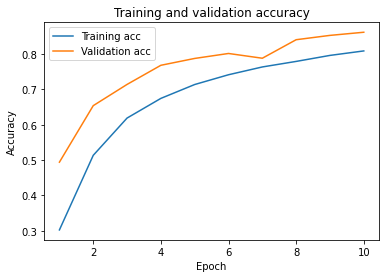

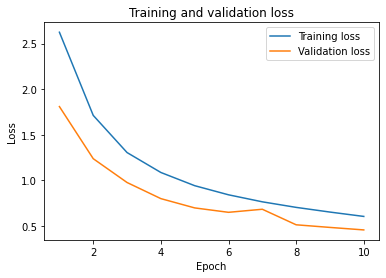

In [61]:
acc = history_wo_reg.history['accuracy']
val_acc = history_wo_reg.history['val_accuracy']
loss = history_wo_reg.history['loss']
val_loss = history_wo_reg.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()

plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.show()

In [17]:
# save model and architecture to single file
model_wo_reg.save("./savedModel/withoutRegularization.h5")

In [18]:
#load model
reload_history_wo_reg = keras.models.load_model('./savedModel/withoutRegularization.h5', custom_objects={'tf': tf})

In [19]:
#evaluate against validation data
score = reload_history_wo_reg.evaluate_generator(generator=valid_generator,steps=STEP_SIZE_VALID)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

C:\Users\akarunakaran1\Documents\Anaconda\lib\site-packages\tensorflow\python\keras\engine\training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


Validation loss: 0.4580492079257965
Validation accuracy: 0.8616987466812134


## Model with L1 regularization

In [20]:
#fit model with L1 regularization
def w_L1_regularization():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same',input_shape=(32,32,3)))
    model.add(Activation('relu'))
    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Dense(512, activation = 'relu',
                    kernel_regularizer=regularizers.l1(0.0001)))
    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(512, activation = 'relu', 
                    kernel_regularizer=regularizers.l1(0.0001)))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    #we have 38 label classes
    model.add(Dense(38, activation='softmax',
                    kernel_regularizer=regularizers.l1(0.0001)))
      
    # Compile model
    model.compile(optimizers.RMSprop(lr=0.0001, decay=1e-6),
                  loss="categorical_crossentropy",metrics=["accuracy"])
    return model

In [21]:
#setting values
STEP_SIZE_TRAIN = train_generator.n//train_generator.batch_size
STEP_SIZE_VALID = valid_generator.n//valid_generator.batch_size

# build the model
model_w_L1_reg = w_L1_regularization()

#fitting the model
history_w_L1_reg = model_w_L1_reg.fit_generator(generator=train_generator,steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_generator,validation_steps=STEP_SIZE_VALID,epochs=10)

Epoch 1/10
1171/1171 [==============================] - 393s 334ms/step - loss: 4.9756 - accuracy: 0.2122 - val_loss: 3.0705 - val_accuracy: 0.5013
Epoch 2/10
1171/1171 [==============================] - 388s 332ms/step - loss: 3.0396 - accuracy: 0.4974 - val_loss: 2.2014 - val_accuracy: 0.7007
Epoch 3/10
1171/1171 [==============================] - 388s 331ms/step - loss: 2.3516 - accuracy: 0.6363 - val_loss: 1.8435 - val_accuracy: 0.7584
Epoch 4/10
1171/1171 [==============================] - 388s 332ms/step - loss: 1.9933 - accuracy: 0.6982 - val_loss: 1.6209 - val_accuracy: 0.7896
Epoch 5/10
1171/1171 [==============================] - 390s 333ms/step - loss: 1.7681 - accuracy: 0.7312 - val_loss: 1.4524 - val_accuracy: 0.8066
Epoch 6/10
1171/1171 [==============================] - 390s 333ms/step - loss: 1.6135 - accuracy: 0.7539 - val_loss: 1.3301 - val_accuracy: 0.8275
Epoch 7/10
1171/1171 [==============================] - 391s 334ms/step - loss: 1.4850 - accuracy: 0.7719 - val_

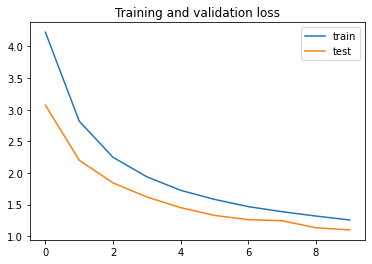

In [22]:
#model_w_l1_reg

# plot training history
plt.plot(history_w_L1_reg.history['loss'], label='train')
plt.plot(history_w_L1_reg.history['val_loss'], label='test')
plt.title('Training and validation loss')
plt.legend()
plt.show()

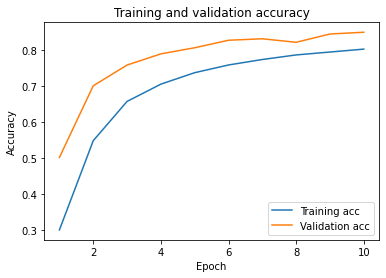

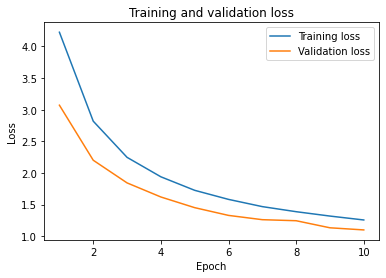

In [60]:
acc = history_w_L1_reg.history['accuracy']
val_acc = history_w_L1_reg.history['val_accuracy']
loss = history_w_L1_reg.history['loss']
val_loss = history_w_L1_reg.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()

plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.show()

In [23]:
# save model and architecture to single file
model_w_L1_reg.save("./savedModel/withL1Regularization.h5")

In [24]:
#load model
reload_history_w_L1_reg = keras.models.load_model('./savedModel/withL1Regularization.h5', custom_objects={'tf': tf})

In [25]:
#evaluate against validation data
score = reload_history_w_L1_reg.evaluate_generator(generator=valid_generator,steps=STEP_SIZE_VALID)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

Validation loss: 1.1003550291061401
Validation accuracy: 0.8501602411270142


## Model with L2 regularization

In [26]:
#fit model with L2 regularization
def w_L2_regularization():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same',input_shape=(32,32,3)))
    model.add(Activation('relu'))
    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Dense(512, activation = 'relu', 
                    kernel_regularizer=regularizers.l2(0.0001)))
    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(512, activation = 'relu', 
                    kernel_regularizer=regularizers.l2(0.0001)))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    #we have 38 label classes
    model.add(Dense(38, activation='softmax',
                    kernel_regularizer=regularizers.l2(0.0001)))
      
    # Compile model
    model.compile(optimizers.RMSprop(lr=0.0001, decay=1e-6),
                  loss="categorical_crossentropy",metrics=["accuracy"])
    return model

In [27]:
#setting values
STEP_SIZE_TRAIN = train_generator.n//train_generator.batch_size
STEP_SIZE_VALID = valid_generator.n//valid_generator.batch_size

# build the model
model_w_L2_reg = w_L2_regularization()

#fitting the model
history_w_L2_reg = model_w_L2_reg.fit_generator(generator=train_generator,steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_generator,validation_steps=STEP_SIZE_VALID,epochs=10)

Epoch 1/10
1171/1171 [==============================] - 382s 325ms/step - loss: 3.1109 - accuracy: 0.2056 - val_loss: 1.6702 - val_accuracy: 0.5552
Epoch 2/10
1171/1171 [==============================] - 381s 325ms/step - loss: 1.7263 - accuracy: 0.5286 - val_loss: 1.0420 - val_accuracy: 0.7177
Epoch 3/10
1171/1171 [==============================] - 382s 326ms/step - loss: 1.2078 - accuracy: 0.6613 - val_loss: 0.8771 - val_accuracy: 0.7554
Epoch 4/10
1171/1171 [==============================] - 381s 326ms/step - loss: 0.9796 - accuracy: 0.7240 - val_loss: 0.6964 - val_accuracy: 0.8115
Epoch 5/10
1171/1171 [==============================] - 379s 324ms/step - loss: 0.8813 - accuracy: 0.7541 - val_loss: 0.6305 - val_accuracy: 0.8322
Epoch 6/10
1171/1171 [==============================] - 381s 325ms/step - loss: 0.7862 - accuracy: 0.7777 - val_loss: 0.6224 - val_accuracy: 0.8326
Epoch 7/10
1171/1171 [==============================] - 381s 325ms/step - loss: 0.7200 - accuracy: 0.8044 - val_

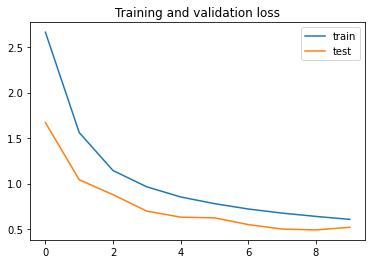

In [59]:
#model_w_l2_reg

# plot training history
plt.plot(history_w_L2_reg.history['loss'], label='train')
plt.plot(history_w_L2_reg.history['val_loss'], label='test')
plt.title('Training and validation loss')
plt.legend()
plt.show()

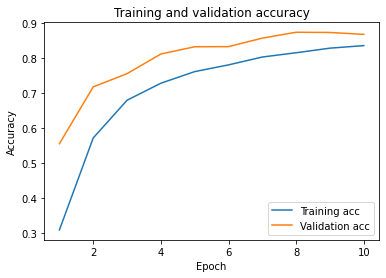

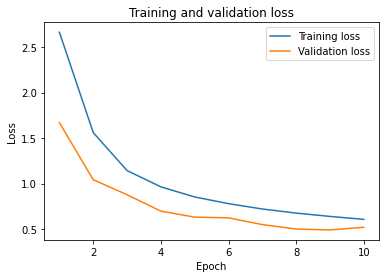

In [58]:
acc = history_w_L2_reg.history['accuracy']
val_acc = history_w_L2_reg.history['val_accuracy']
loss = history_w_L2_reg.history['loss']
val_loss = history_w_L2_reg.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()

plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.show()

In [29]:
# save model and architecture to single file
model_w_L2_reg.save("./savedModel/withL2Regularization.h5")

In [30]:
#load model
reload_history_w_L2_reg = keras.models.load_model('./savedModel/withL2Regularization.h5', custom_objects={'tf': tf})

In [31]:
#evaluate against validation data
score = reload_history_w_L2_reg.evaluate_generator(generator=valid_generator,steps=STEP_SIZE_VALID)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

Validation loss: 0.5189948678016663
Validation accuracy: 0.8676282167434692


## Now let's predict the labels for test data

In [32]:
#test generator
test_datagen = ImageDataGenerator(rescale=1./255.)

test_generator = datagen.flow_from_dataframe(dataframe=test_df, 
                                             directory="C:/Users/akarunakaran1/Documents/TypeB_Botanist/Botanist/TestFiles/",
                                             x_col="FileName",y_col=None,batch_size=32,seed=42,shuffle=False,
                                             class_mode=None,target_size=(32,32)                                            )

Found 4000 validated image filenames.


In [33]:
test_generator.reset()
STEP_SIZE_TEST = test_generator.n//test_generator.batch_size
STEP_SIZE_TEST

125

## Accuracy of model with regularization L2 is better, so make predictions using this model

In [38]:
#prediction using model with L2 regularization
pred = reload_history_w_L2_reg.predict_generator(test_generator,steps=STEP_SIZE_TEST,verbose=1)
print(len(pred))
print("predictions on test data",pred)

predicted_class_indices = np.argmax(pred,axis=1)
print("predicted_class_indices",predicted_class_indices)

C:\Users\akarunakaran1\Documents\Anaconda\lib\site-packages\tensorflow\python\keras\engine\training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


125/125 [==============================] - 13s 98ms/step
4000
predictions on test data [[3.5483282e-08 5.3457524e-07 3.6809686e-06 ... 1.5899888e-06
  1.5237842e-06 3.0382779e-08]
 [7.8203222e-08 2.5852823e-03 7.8354625e-04 ... 1.9685853e-02
  1.4880294e-04 6.7346252e-04]
 [1.2519877e-10 9.2495002e-06 4.6493567e-10 ... 1.4774336e-08
  1.1031329e-08 1.5831212e-08]
 ...
 [8.4066434e-12 2.4786621e-07 5.5035471e-04 ... 4.0818165e-11
  5.2144815e-04 2.1484661e-06]
 [1.0785582e-17 9.9999988e-01 3.4069900e-09 ... 8.2402027e-13
  4.7375180e-11 7.3058665e-08]
 [4.3375039e-05 2.6767491e-04 5.7294792e-06 ... 5.7947309e-05
  2.5615471e-05 1.4557944e-05]]
predicted_class_indices [21 18 17 ... 20  1 29]


In [41]:
predicted_class_indices

array([21, 18, 17, ..., 20,  1, 29], dtype=int64)

In [43]:
#assigning corresponding labels to test data
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]
len(predictions)

4000

In [46]:
#creating dataframe with filename and prediction values

results = pd.DataFrame({"Label":predictions})
print(results.head(5))

  Label
0    29
1    26
2    25
3    16
4    35


In [49]:
print("Working directory",os.getcwd())

#save result
results.to_csv("B.csv",index=False)

Working directory C:\Users\akarunakaran1\Documents\TypeB_Botanist


In [47]:
print("Working directory",os.getcwd())


Working directory C:\Users\akarunakaran1\Documents\TypeB_Botanist


#### REFERENCES:
+ https://vijayabhaskar96.medium.com/tutorial-on-keras-flow-from-dataframe-1fd4493d237c
+ https://www.kaggle.com/yassineghouzam/introduction-to-cnn-keras-0-997-top-6
+ https://stackoverflow.com/questions/62218611/how-to-train-a-model-with-a-dataset-in-which-image-dataset-is-given-and-label-fo
+ https://studymachinelearning.com/keras-imagedatagenerator-with-flow_from_dataframe/
+ https://www.analyticsvidhya.com/blog/2018/04/fundamentals-deep-learning-regularization-techniques/
+ https://stackoverflow.com/questions/44813662/keras-unexpected-kernel-regularizer-error